In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


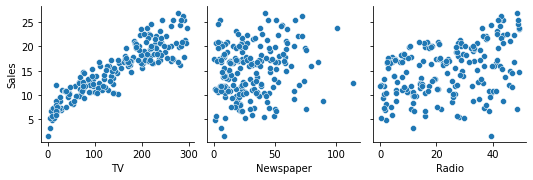

In [18]:
import seaborn as sns
# visualise correlation of sales vs other features
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', aspect=1, kind='scatter')
plt.show()


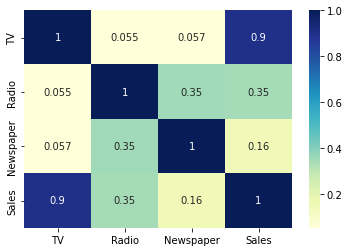

In [19]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [32]:
# if multiple then pass multiple features
#   i.e. df.iloc[:, :-1]
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, -1].values.reshape(-1, 1)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)

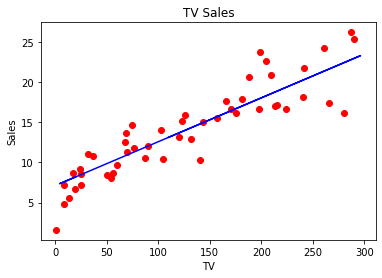

In [37]:
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, regressor.predict(X_train), color="blue")
plt.title("TV Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [39]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  1.949384253020705
Mean Squared Error: 6.010070421507887
Root Mean Squared Error: 2.451544497150294
